In [235]:
import numpy as np
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from IPython import display
import random
import statistics as stat
%run Backend_Retrieval.ipynb

In [226]:
####################################################################
#          PARAMS
####################################################################
start_time=time.perf_counter()

L= 2000        
steps_setup= 100               
splim = 17.8816 #40mph


des_speed=splim    
des_speed_inv=1/splim     
del_t= 0.5                   
acc_exp= 4                  
time_gap= 1               
min_gap= 2                  
comf_decel= 1.5               
acc_max= 1                 
length = 2
N = 25
 

#Parameter set-up
params=[]
params.append(des_speed_inv)
params.append(acc_exp)
params.append(time_gap)
params.append(comf_decel)
params.append(min_gap)
params.append(acc_max)
params.append(del_t)
params.append(length)
params.append(L)
####################################################################
#          PARAMETER SUMMARY
####################################################################
#  SETUP:
# acc exponent  = 4
# time_gap      = 1
# min space gap = 2
# comf decel    = 1.5
# max accel     = 1
# car length    = 2
####################################################################

In [164]:
#search for stable probablity
car_on_prob_list = np.linspace(0,0.035,100)
unhappy_over_xx = []
time_speed_before_tot = []
time_speed_after_tot = []
time_speed_general_tot = []
index = -1

for xx in car_on_prob_list:
    index+=1
    junc500 = junction(500,xx,0.01,[],[],30,3)
    N = 25
    time_speed_before = [] 
    time_speed_after = []
    time_speed_general = []
    unhappy_counter = []
    
    
    vel= np.zeros(N)     
    pos = np.zeros(N)
    start = np.linspace(0,400,N)
    for j in range(N):
        pos[j]=start[j]       
    acc= np.zeros(N)      
    headway = np.zeros(N)
    dv = np.zeros(N)
    for i in range(N):
        DisGap = 0
        if i+1!=N:
            if pos[i]>(pos[i+1]-length):
                DisGap = (pos[i+1]-length-pos[i]+L)
            elif pos[i]<(pos[i+1]-length):
                DisGap = (pos[i+1]-length-pos[i])
            dv[i] = vel[i]-vel[i+1]
        else:
            if pos[i]>(pos[0]-length):
                DisGap = (pos[0]-length-pos[i]+L)
            else:
                DisGap = (pos[0]-length-pos[i])
            dv[i] = vel[i]-vel[0]
        headway[i] = DisGap
    posnew= np.zeros(N)        
    velnew= np.zeros(N)
    time_pass=0
    
    
    for i in range(20000):
        if i%500==0:
            print(i)
        if N==0:
            time_pass+=del_t
            unhappy_counter.append(len(junc500.que))
        else:
            pos,vel,acc,dv,headway,N,posnew,velnew = junc500.car_on(pos, vel, acc, dv, headway, L, length, N, posnew, velnew)

            posnew, velnew, acc = upd_pos_vel(N, pos, vel, acc, headway, dv, posnew, velnew, params)

            inst_time1, inst_vel1 = detect_loop(N,pos,vel,acc,posnew,velnew, 490, time_pass)
            inst_time2, inst_vel2 = detect_loop(N,pos,vel,acc,posnew,velnew, 510, time_pass)
            inst_time3, inst_vel3 = detect_loop(N,pos,vel,acc,posnew,velnew, 1500, time_pass)
            if len([inst_time1])>0:
                time_speed_before.append([inst_time1,inst_vel1])
            if len([inst_time2])>0:
                time_speed_after.append([inst_time2,inst_vel2])
            if len([inst_time3])>0:
                time_speed_general.append([inst_time3,inst_vel3])


            pos,vel,acc,dv,headway,N,posnew,velnew = junc500.car_off(pos, vel, acc, dv, headway, L, length, N, posnew, velnew)

            unhappy_counter.append(len(junc500.que))

            pos, vel, headway, dv = update_cars(N, pos, vel, posnew, velnew, headway, dv, params)

            time_pass = time_pass + del_t
            
    unhappy_over_xx.append(unhappy_counter)
    time_speed_before_tot.append(time_speed_before)
    time_speed_after_tot.append(time_speed_after)
    time_speed_general_tot.append(time_speed_general)
    print(f'{index} complete')

0
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
500
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
1000
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
1500
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
2000
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
0 complete
0
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
500
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
1000
CAR REMOVED
CAR REMOVED
1500
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
2000
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
125

CAR REMOVED
2500
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
3000
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
3500
CAR REMOVED
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
12 complete
0
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
500
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
1000
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
1500
CAR REMOVED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
2000
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
2500
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
3000
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000

CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
6500
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
7000
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
7500
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
8000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
8500
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
9000
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
9500
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
10000
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
10500
CAR ADDED

CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR ADDED
4500
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
5000
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
5500
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
6000
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
6500
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
7000
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
7500
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
8000
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CA

CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
1000
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
1500
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
2000
CAR ADDED
CAR ADDED
2500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
3000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
3500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
4000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
4500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
5000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
5500
CAR ADDED
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
29 complete
0
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
500
CAR REMOVED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDE

8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
38 complete
0
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
1000
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
1500
CAR ADDED
2000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
2500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
3000
CAR ADDED
CAR ADDED
CAR ADDED
3500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
4000
CAR ADDED
CAR ADDED
4500
CAR ADDED
5000
CAR ADDED
CAR ADDED
5500
CAR ADDED
CAR ADDED
6000
6500
7000
7500
8000
8500
9000
9500
10000

CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
4000
CAR ADDED
CAR ADDED
4500
CAR ADDED
CAR ADDED
5000
CAR ADDED
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
46 complete
0
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
500
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
1000
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
1500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
2000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
2500
CAR ADDED
CAR ADDED
CAR ADDED
3000
CAR ADDED
CAR ADDED
3500
CAR ADDED
CAR ADDED
4000
CAR ADDED
CAR ADDED
4500
CAR ADDED
CAR ADDED
5000
CAR ADDED
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500


CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
500
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
1000
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
1500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
2000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
2500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
57 complete
0
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
500
CAR ADDED
CAR ADDED
CAR 

CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
1000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
1500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
2000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
2500
CAR ADDED
CAR ADDED
3000
CAR ADDED
CAR ADDED
3500
CAR ADDED
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
68 complete
0
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR ADDED
500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
1000
CAR ADDED
CAR ADDED
CAR ADDED

CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
1000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
1500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
2000
CAR ADDED
CAR ADDED
CAR ADDED
2500
CAR ADDED
CAR ADDED
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
79 complete
0
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
1000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
1500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
2000
CAR ADDED
CAR ADDED
2500
CAR ADDED
CAR ADDED
3000
CAR ADDED
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000


CAR ADDED
1500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
2000
CAR ADDED
CAR ADDED
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
90 complete
0
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR ADDED
CAR REMOVED
CAR REMOVED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
500
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
1000
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
CAR ADDED
1500
CAR ADDED
CAR ADDED
2000
CAR ADDED
CAR ADDED
2500
CAR ADDED
CAR ADDED
3000
CAR ADDED
CAR ADDED
3500
CAR ADDED
CAR ADDED
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
91 comple

In [165]:
y = []
for i in range(100):
    y.append(stat.mean(unhappy_over_xx[i]))

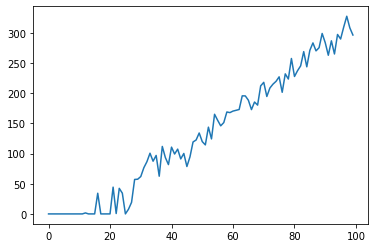

In [166]:
plt.plot(y)

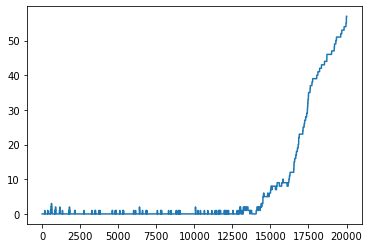

In [184]:
plt.plot(unhappy_over_xx[26])

In [168]:
a = np.linspace(0,0.1,100)
print(a[30])

0.030303030303030304


In [169]:
time_speed_before_tot_clean = []
time_speed_after_tot_clean = []
time_speed_general_tot_clean = []
for jj in range(100):
    time_speed_before_tot_clean.append([ele for ele in time_speed_before_tot[jj] if ele != [[],[]]])
    time_speed_after_tot_clean.append([ele for ele in time_speed_after_tot[jj] if ele != [[],[]]])
    time_speed_general_tot_clean.append([ele for ele in time_speed_general_tot[jj] if ele != [[],[]]])

In [177]:
before_flow_over_prob = []
after_flow_over_prob = []
general_flow_over_prob = []
before_dens_over_prob = []
after_dens_over_prob = []
general_dens_over_prob = []
for ii in range(100):
    before_flow_over_prob.append(len(time_speed_before_tot_clean[ii])*1.8)
    after_flow_over_prob.append(len(time_speed_after_tot_clean[ii])*1.8)
    general_flow_over_prob.append(len(time_speed_general_tot_clean[ii])*1.8)

for jj in range(100):
    count = 0
    count2 = 0
    count3 = 0
    for kk in range(len(time_speed_before_tot_clean[jj])):
        count += time_speed_before_tot_clean[jj][kk][1][0]  
    before_dens_over_prob.append((len(time_speed_before_tot_clean[jj])*1.8)/(count/len(time_speed_before_tot_clean[jj])))
    for nn in range(len(time_speed_after_tot_clean[jj])):
        count2 += time_speed_after_tot_clean[jj][nn][1][0]
    after_dens_over_prob.append((len(time_speed_after_tot_clean[jj])*1.8)/(count/len(time_speed_after_tot_clean[jj])))
    for mm in range(len(time_speed_general_tot_clean[jj])):
            count3 += time_speed_general_tot_clean[jj][mm][1][0]
    general_dens_over_prob.append((len(time_speed_general_tot_clean[jj])*1.8)/(count/len(time_speed_general_tot_clean[jj])))

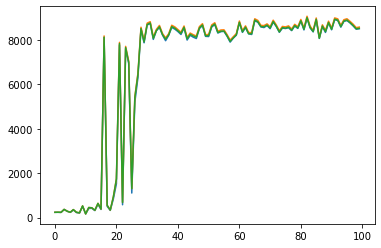

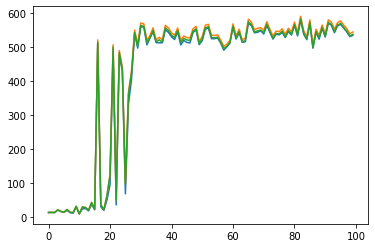

In [178]:
plt.plot(before_flow_over_prob)
plt.plot(after_flow_over_prob)
plt.plot(general_flow_over_prob)
plt.show()
plt.plot(before_dens_over_prob)
plt.plot(after_dens_over_prob)
plt.plot(general_dens_over_prob)

In [219]:
steps = 20000

In [233]:
#tl250 = trafficlight(500,[500,1500],500,30,[])
#junc250 = junction(501, 0.1, 0.01, [], [], 30, 3)
car_on_prob_list = np.linspace(0,0.01,100)
unhappy_over_xx_tl = []
time_speed_before_tot_tl = []
time_speed_after_tot_tl = []
time_speed_general_tot_tl = []
cars_on_road_tl = []
index = -1
                          

for xx in car_on_prob_list:
    index+=1
    
    N = 25
    time_speed_before = [] 
    time_speed_after = []
    time_speed_general = []
    unhappy_counter = []
    cars_on_tl = []
    tl250 = trafficlight(500,[500,1750,3250,4500,5750,7000,8250,9500,10750,12000,13250,14500,15750,17000,18250,19500],500,30,[])
    junc250 = junction(501, xx, 0.01, [], [], 30, 3)
    vel= np.zeros(N)     
    pos = np.zeros(N)
    start = np.linspace(0,400,N)
    for j in range(N):
        pos[j]=start[j]       
    acc= np.zeros(N)      
    headway = np.zeros(N)
    dv = np.zeros(N)
    for i in range(N):
        DisGap = 0
        if i+1!=N:
            if pos[i]>(pos[i+1]-length):
                DisGap = (pos[i+1]-length-pos[i]+L)
            elif pos[i]<(pos[i+1]-length):
                DisGap = (pos[i+1]-length-pos[i])
            dv[i] = vel[i]-vel[i+1]
        else:
            if pos[i]>(pos[0]-length):
                DisGap = (pos[0]-length-pos[i]+L)
            else:
                DisGap = (pos[0]-length-pos[i])
            dv[i] = vel[i]-vel[0]
        headway[i] = DisGap
    posnew= np.zeros(N)        
    velnew= np.zeros(N)
    time_pass=0
    redlight = False
    for ii in range(20000):
        if N==0:
            time_pass+=del_t
            unhappy_counter.append(len(junc250.que))
            cars_on_tl.append(0)
            if ii%500==0:
                print(ii)
        else:
            cars_on_tl.append(N)
            if ii%500==0:
                print(ii)
            runorangered = False
            for x in tl250.steps_on:
                if x == ii:
                    runorangered =True
            if runorangered:
                tl250.orange_light(pos,vel)
                print(tl250.stop_index)
                pos,vel,acc,headway,dv,N,posnew,velnew,redlight = tl250.red_light(pos, vel, acc, headway, dv, N, posnew, velnew, redlight)
            if redlight:
                pos,vel, acc, headway, dv, N, posnew, velnew, redlight = tl250.green_light(pos, vel, acc, headway, dv, N, posnew, velnew, redlight, ii)

            #if not redlight:
                #pos,vel,acc,dv,headway,N,posnew,velnew = junc250.car_on(pos, vel, acc, dv, headway, L, length, N, posnew, velnew)
            #tag on for give way

            pos,vel,acc,headway,dv,N,posnew,velnew = junc250.car_on_lights(pos, vel, acc, headway, dv, N, posnew, velnew, L, length, tl250.loc, tl250.braking_dist)

            posnew, velnew, acc = upd_pos_vel(N, pos, vel, acc, headway, dv, posnew, velnew, params)

            inst_time1, inst_vel1 = detect_loop(N,pos,vel,acc,posnew,velnew, 490, time_pass)
            inst_time2, inst_vel2 = detect_loop(N,pos,vel,acc,posnew,velnew, 510, time_pass)
            inst_time3, inst_vel3 = detect_loop(N,pos,vel,acc,posnew,velnew, 1500, time_pass)
            if len([inst_time1])>0:
                time_speed_before.append([inst_time1,inst_vel1])
            if len([inst_time2])>0:
                time_speed_after.append([inst_time2,inst_vel2])
            if len([inst_time3])>0:
                time_speed_general.append([inst_time3,inst_vel3])

            posnew,velnew,acc = tl250.retain_state(posnew,velnew,acc)
            if not redlight:
                pos,vel,acc,dv,headway,N,posnew,velnew = junc250.car_off(pos, vel, acc, dv, headway, L, length, N, posnew, velnew)

            pos, vel, headway, dv = update_cars(N, pos, vel, posnew, velnew, headway, dv, params)

            unhappy_counter.append(len(junc250.que))
            time_pass = time_pass + del_t

    cars_on_road_tl.append(cars_on_tl)
    unhappy_over_xx_tl.append(unhappy_counter)
    time_speed_before_tot_tl.append(time_speed_before)
    time_speed_after_tot_tl.append(time_speed_after)
    time_speed_general_tot_tl.append(time_speed_general)
    print(f'{index}complete')

0
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
500
[17]
CAR ADDED
1000
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
1500
CAR REMOVED
CAR REMOVED
[9]
CAR ADDED
2000
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
2500
CAR REMOVED
CAR REMOVED
CAR REMOVED
3000
CAR REMOVED
[3]
CAR ADDED
3500
CAR REMOVED
CAR REMOVED
CAR REMOVED
CAR REMOVED
4000
CAR REMOVED
CAR REMOVED
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
0complete
0
CAR REMOVED
CAR REMOVED
500
[20]
CAR ADDED
1000
CAR REMOVED


KeyboardInterrupt: 

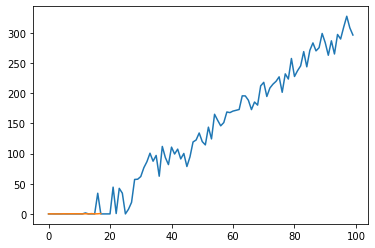

In [217]:
z = []
for i in range(100):
    z.append(stat.mean(unhappy_over_xx[i]))
y = []
for i in range(18):
    y.append(stat.mean(unhappy_over_xx_tl[i]))
plt.plot(z)
plt.plot(y)


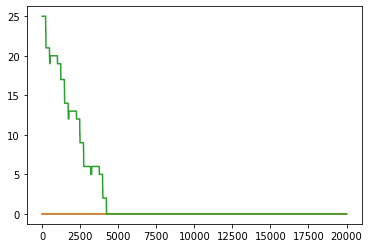

In [234]:
p=0
plt.plot(unhappy_over_xx[p])
plt.plot(unhappy_over_xx_tl[p])
plt.plot(cars_on_road_tl[0])

In [201]:
time_speed_before_tot_clean_tl = []
time_speed_after_tot_clean_tl = []
time_speed_general_tot_clean_tl = []
for jj in range(100):
    time_speed_before_tot_clean_tl.append([ele for ele in time_speed_before_tot_tl[jj] if ele != [[],[]]])
    time_speed_after_tot_clean_tl.append([ele for ele in time_speed_after_tot_tl[jj] if ele != [[],[]]])
    time_speed_general_tot_clean_tl.append([ele for ele in time_speed_general_tot_tl[jj] if ele != [[],[]]])

In [202]:
before_flow_over_prob_tl = []
after_flow_over_prob_tl = []
general_flow_over_prob_tl = []
before_dens_over_prob_tl = []
after_dens_over_prob_tl = []
general_dens_over_prob_tl = []
for ii in range(100):
    before_flow_over_prob_tl.append(len(time_speed_before_tot_clean_tl[ii])*(3600/(steps*del_t)))
    after_flow_over_prob_tl.append(len(time_speed_after_tot_clean_tl[ii])*(3600/(steps*del_t)))
    general_flow_over_prob_tl.append(len(time_speed_general_tot_clean_tl[ii])*(3600/(steps*del_t)))

for jj in range(100):
    count = 0
    count2 = 0
    count3 = 0
    for kk in range(len(time_speed_before_tot_clean_tl[jj])):
        count += time_speed_before_tot_clean_tl[jj][kk][1][0]
    before_dens_over_prob_tl.append((len(time_speed_before_tot_clean_tl[jj])*(3600/(steps*del_t)))/(count/len(time_speed_before_tot_clean_tl[jj])))
    for nn in range(len(time_speed_after_tot_clean_tl[jj])):
        count2 += time_speed_after_tot_clean_tl[jj][nn][1][0]
    after_dens_over_prob_tl.append((len(time_speed_after_tot_clean_tl[jj])*(3600/(steps*del_t)))/(count/len(time_speed_after_tot_clean_tl[jj])))
    for mm in range(len(time_speed_general_tot_clean_tl[jj])):
            count3 += time_speed_general_tot_clean_tl[jj][mm][1][0]
    general_dens_over_prob_tl.append((len(time_speed_general_tot_clean_tl[jj])*(3600/(steps*del_t)))/(count/len(time_speed_general_tot_clean_tl[jj])))

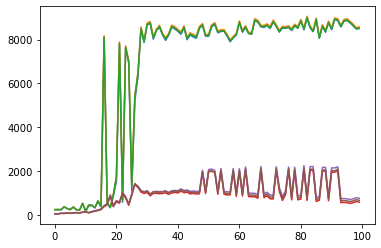

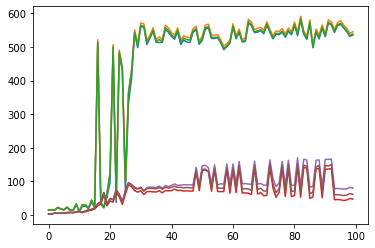

In [203]:
plt.plot(before_flow_over_prob)
plt.plot(after_flow_over_prob)
plt.plot(general_flow_over_prob)
plt.plot(before_flow_over_prob_tl)
plt.plot(after_flow_over_prob_tl)
plt.plot(general_flow_over_prob_tl)
plt.show()
plt.plot(before_dens_over_prob)
plt.plot(after_dens_over_prob)
plt.plot(general_dens_over_prob)
plt.plot(before_dens_over_prob_tl)
plt.plot(after_dens_over_prob_tl)
plt.plot(general_dens_over_prob_tl)

In [ ]:
#tl250 = trafficlight(500,[500,1500],500,30,[])
#junc250 = junction(501, 0.1, 0.01, [], [], 30, 3)
car_on_prob_list = np.linspace(0,0.035,100)
unhappy_over_xx_tlg = []
time_speed_before_tot_tlg = []
time_speed_after_tot_tlg = []
time_speed_general_tot_tlg = []
index = -1
                          

for xx in car_on_prob_list:
    index+=1
    
    N = 25
    time_speed_before = [] 
    time_speed_after = []
    time_speed_general = []
    unhappy_counter = []
    tl250 = trafficlight(500,[500,1750,2000,3250,4500,5750,7000,8250,9500,10750,12000,13250,14500,15750,17000,18250,19500],500,30,[])
    junc250 = junction(501, xx, 0.01, [], [], 30, 3)
    vel= np.zeros(N)     
    pos = np.zeros(N)
    start = np.linspace(0,400,N)
    for j in range(N):
        pos[j]=start[j]       
    acc= np.zeros(N)      
    headway = np.zeros(N)
    dv = np.zeros(N)
    for i in range(N):
        DisGap = 0
        if i+1!=N:
            if pos[i]>(pos[i+1]-length):
                DisGap = (pos[i+1]-length-pos[i]+L)
            elif pos[i]<(pos[i+1]-length):
                DisGap = (pos[i+1]-length-pos[i])
            dv[i] = vel[i]-vel[i+1]
        else:
            if pos[i]>(pos[0]-length):
                DisGap = (pos[0]-length-pos[i]+L)
            else:
                DisGap = (pos[0]-length-pos[i])
            dv[i] = vel[i]-vel[0]
        headway[i] = DisGap
    posnew= np.zeros(N)        
    velnew= np.zeros(N)
    time_pass=0
    redlight = False
    for i in range(20000):
        if i%500==0:
            print(i)
        runorangered = False
        for x in tl250.steps_on:
            if x == i:
                runorangered =True
        if runorangered:
            tl250.orange_light(pos,vel)
            pos,vel,acc,headway,dv,N,posnew,velnew,redlight = tl250.red_light(pos, vel, acc, headway, dv, N, posnew, velnew, redlight)
        if redlight:
            pos,vel, acc, headway, dv, N, posnew, velnew, redlight = tl250.green_light(pos, vel, acc, headway, dv, N, posnew, velnew, redlight, i)

        if not redlight:
            pos,vel,acc,dv,headway,N,posnew,velnew = junc250.car_on(pos, vel, acc, dv, headway, L, length, N, posnew, velnew)
        #tag on for give way

        pos,vel,acc,headway,dv,N,posnew,velnew = junc250.car_on_lights(pos, vel, acc, headway, dv, N, posnew, velnew, L, length, tl250.loc, tl250.braking_dist)

        posnew, velnew, acc = upd_pos_vel(N, pos, vel, acc, headway, dv, posnew, velnew, params)
                              
        inst_time1, inst_vel1 = detect_loop(N,pos,vel,acc,posnew,velnew, 490, time_pass)
        inst_time2, inst_vel2 = detect_loop(N,pos,vel,acc,posnew,velnew, 510, time_pass)
        inst_time3, inst_vel3 = detect_loop(N,pos,vel,acc,posnew,velnew, 1500, time_pass)
        if len([inst_time1])>0:
            time_speed_before.append([inst_time1,inst_vel1])
        if len([inst_time2])>0:
            time_speed_after.append([inst_time2,inst_vel2])
        if len([inst_time3])>0:
            time_speed_general.append([inst_time3,inst_vel3])

        posnew,velnew,acc = tl250.retain_state(posnew,velnew,acc)
        if not redlight:
            pos,vel,acc,dv,headway,N,posnew,velnew = junc250.car_off(pos, vel, acc, dv, headway, L, length, N, posnew, velnew)

        pos, vel, headway, dv = update_cars(N, pos, vel, posnew, velnew, headway, dv, params)
        
        unhappy_counter.append(len(junc250.que))
        time_pass = time_pass + del_t
                          
    unhappy_over_xx_tlg.append(unhappy_counter)
    time_speed_before_tot_tlg.append(time_speed_before)
    time_speed_after_tot_tlg.append(time_speed_after)
    time_speed_general_tot_tlg.append(time_speed_general)
    print(f'{index}complete')

In [ ]:
zz = []
for i in range(100):
    zz.append(stat.mean(unhappy_over_xx_tlg[i]))
plt.plot(z)
plt.plot(y)
plt.plot(zz)

In [ ]:
p=80


plt.plot(unhappy_over_xx[p])
plt.plot(unhappy_over_xx_tl[p])
plt.plot(unhappy_over_xx_tlg[p])

In [ ]:
time_speed_before_tot_clean_tlg = []
time_speed_after_tot_clean_tlg = []
time_speed_general_tot_clean_tlg = []
for jj in range(100):
    time_speed_before_tot_clean_tlg.append([ele for ele in time_speed_before_tot_tlg[jj] if ele != [[],[]]])
    time_speed_after_tot_clean_tlg.append([ele for ele in time_speed_after_tot_tlg[jj] if ele != [[],[]]])
    time_speed_general_tot_clean_tlg.append([ele for ele in time_speed_general_tot_tlg[jj] if ele != [[],[]]])

In [ ]:
before_flow_over_prob_tlg = []
after_flow_over_prob_tlg = []
general_flow_over_prob_tlg = []
before_dens_over_prob_tlg = []
after_dens_over_prob_tlg = []
general_dens_over_prob_tlg = []
for ii in range(100):
    before_flow_over_prob_tlg.append(len(time_speed_before_tot_clean_tlg[ii])*18)
    after_flow_over_prob_tlg.append(len(time_speed_after_tot_clean_tlg[ii])*18)
    general_flow_over_prob_tlg.append(len(time_speed_general_tot_clean_tlg[ii])*18)

for jj in range(100):
    count = 0
    count2 = 0
    count3 = 0
    for kk in range(len(time_speed_before_tot_clean_tlg[jj])):
        count += time_speed_before_tot_clean_tlg[jj][kk][1][0]  
    before_dens_over_prob_tlg.append(len((time_speed_before_tot_clean_tlg[jj])*18)/(count/len(time_speed_before_tot_clean_tlg[jj])))
    for nn in range(len(time_speed_after_tot_clean_tlg[jj])):
        count2 += time_speed_after_tot_clean_tlg[jj][nn][1][0]
    after_dens_over_prob_tlg.append(len((time_speed_after_tot_clean_tlg[jj])*18)/(count/len(time_speed_after_tot_clean_tlg[jj])))
    for mm in range(len(time_speed_general_tot_clean_tlg[jj])):
            count3 += time_speed_general_tot_clean_tlg[jj][mm][1][0]
    general_dens_over_prob_tlg.append(len((time_speed_general_tot_clean_tlg[jj])*18)/(count/len(time_speed_general_tot_clean_tlg[jj])))

In [ ]:
plt.plot(before_flow_over_prob)
plt.plot(after_flow_over_prob)
plt.plot(general_flow_over_prob)

plt.plot(before_flow_over_prob_tl)
plt.plot(after_flow_over_prob_tl)
plt.plot(general_flow_over_prob_tl)

plt.plot(before_flow_over_prob_tlg)
plt.plot(after_flow_over_prob_tlg)
plt.plot(general_flow_over_prob_tlg)
plt.show()
plt.plot(before_dens_over_prob)
plt.plot(after_dens_over_prob)
plt.plot(general_dens_over_prob)

plt.plot(before_dens_over_prob_tl)
plt.plot(after_dens_over_prob_tl)
plt.plot(general_dens_over_prob_tl)

plt.plot(before_dens_over_prob_tlg)
plt.plot(after_dens_over_prob_tlg)
plt.plot(general_dens_over_prob_tlg)
plt.show()